<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično integriranje</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">September 2017 </font>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Uvod" data-toc-modified-id="Uvod-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev2 toc-item"><a href="#Motivacijski-primer" data-toc-modified-id="Motivacijski-primer-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivacijski primer</a></div><div class="lev1 toc-item"><a href="#Newton-Cotesov-pristop" data-toc-modified-id="Newton-Cotesov-pristop-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Newton-Cotesov pristop</a></div><div class="lev2 toc-item"><a href="#Trapezno-pravilo" data-toc-modified-id="Trapezno-pravilo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Trapezno pravilo</a></div><div class="lev2 toc-item"><a href="#Sestavljeno-trapezno-pravilo" data-toc-modified-id="Sestavljeno-trapezno-pravilo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sestavljeno trapezno pravilo</a></div><div class="lev2 toc-item"><a href="#Simpsonova-in-druge-metode" data-toc-modified-id="Simpsonova-in-druge-metode-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simpsonova in druge metode</a></div><div class="lev2 toc-item"><a href="#Prikaz-uporabe-Simpsonove-1/3-metode" data-toc-modified-id="Prikaz-uporabe-Simpsonove-1/3-metode-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Prikaz uporabe Simpsonove 1/3 metode</a></div><div class="lev1 toc-item"><a href="#Gaussov-integracijski-pristop---Gaussova-kvadratura" data-toc-modified-id="Gaussov-integracijski-pristop---Gaussova-kvadratura-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gaussov integracijski pristop - Gaussova kvadratura</a></div><div class="lev2 toc-item"><a href="#Gaussova-kvadratura-z-enim-vozliščem" data-toc-modified-id="Gaussova-kvadratura-z-enim-vozliščem-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gaussova kvadratura z enim vozliščem</a></div><div class="lev2 toc-item"><a href="#Gaussova-kvadratura-z-več-vozlišči" data-toc-modified-id="Gaussova-kvadratura-z-več-vozlišči-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gaussova kvadratura z več vozlišči</a></div><div class="lev2 toc-item"><a href="#Uporaba-scipy.integrate-modula" data-toc-modified-id="Uporaba-scipy.integrate-modula-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Uporaba <code>scipy.integrate</code> modula</a></div><div class="lev1 toc-item"><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1 toc-item"><a href="#Dodatno" data-toc-modified-id="Dodatno-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dodatno</a></div>

# Uvod

V okviru tega poglavja bomo za dano funkcijo $f(x)$ izračunali določen integral:
$$\int_a^b\,f(x)\,\textrm{d}x$$
kjer sta $a$ in $b$ meji integriranja, $f(x)$ pa so vrednosti funkcije, ki jih pridobimo iz table vrednosti ali s pomočjo analitične funkcije.

Na sliki je prikazan splošen primer, kjer je razdalja med vozlišči $x_i$ enaka $h$ (gre za **ekvidistantno delitev**).
<img src='./fig/integriranje.png' width=400>

Pri numeričnem integriranju integral ocenimo z $I$ in velja
$$\int_a^b\,f(x)\,\textrm{d}x= I + E,$$
kjer je $E$ napaka ocene integrala.

Numerični integral bomo računali na podlagi diskretne vsote:
$$I=\sum_{i=0}^{n}A_i\,f(x_i),$$
kjer so $A_i$ uteži, $x_i$ pa vozlišča; pozneje bomo definirali $n$ kot število podintervalov, skupno število vozlišč pa je $n+1$.

Ogledali si bomo dva različna pristopa k numerični integraciji:
1. *Newton-Cotesov pristop*, ki temelji na ekvidistantnih vozliščih in 
* *Gaussov integracijski pristop*, kjer so vozlišča postavljena tako, da se doseže največji red natančnosti.

## Motivacijski primer

Pri numeričnem integriranju si bomo pomagali s konkretnim primerom:

$$\int_1^2 x\,\sin(x)\,\textrm{d}x$$

Pripravimo si vozlišča. Osnovni korak naj bo $h=0.25$, v tem primeru imamo 4 odseke in 5 vozlišč, pri koraku $2h$ so 3 vozliščne točke in in pri koraku $4h$ samo dve (skrajni):

In [2]:
import numpy as np
xg = np.linspace(1, 2, 100) # goste točke (za prikaz)
x2 = np.linspace(1, 2, 2)  # korak h1 = 1 (2 vozlišči)
x3 = np.linspace(1, 2, 3)  # korak h2 = 0.5 (3 vozlišča)
x4 = np.linspace(1, 2, 4)  # korak h3 = 0.33 (4 vozlišča)
x5 = np.linspace(1, 2, 5)  # korak h3 = 0.25 (5 vozlišč)
h2 = x2[1] - x2[0]
h3 = x3[1] - x3[0]
h4 = x4[1] - x4[0]
h5 = x5[1] - x5[0]

Pripravimo še funkcijske vrednosti:

In [3]:
yg = xg * np.sin(xg)
y2 = x2 * np.sin(x2)
y3 = x3 * np.sin(x3)
y4 = x4 * np.sin(x4)
y5 = x5 * np.sin(x5)

Pripravimo prikaz podatkov:

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc # to uvozimo, da so fonti na sliki latex ustrezni
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
%matplotlib inline
def fig():
    plt.fill_between(xg, yg, alpha=0.25, facecolor='r')
    plt.annotate('$\int_1^2\,x\,\sin(x)\,\\textrm{d}x$', (1.3, 0.5), fontsize=22)
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\,\sin(x)$')
    plt.plot(x2, y2, 's', alpha=0.5, label=f'$h={h2}$', markersize=14)
    plt.plot(x3, y3, 'o', alpha=0.5, label=f'$h={h3}$', markersize=10)
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

In prikažimo podatke:

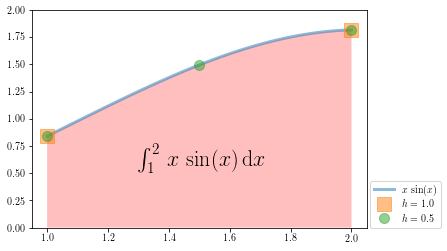

In [5]:
fig()

Analitično izračunajmo točen rezultat:

In [22]:
import sympy as sym
sym.init_printing()
x = sym.symbols('x')
I_točno = float(sym.integrate(x*sym.sin(x), (x, 1, 2)).evalf())
I_točno

# Newton-Cotesov pristop

V okviru tega poglavja si bomo najprej pogledali trapezno ter sestavljeno trapezno pravilo; pozneje pa si bomo pogledali posplošen pristop ter izpeljali Simpsonovo 1/3 ter druge metode.

## Trapezno pravilo

Trapezno pravilo vrednosti na (pod)intervalu interpolira z linearno funkcijo. Za dve vozliščni točki to pomeni, da površin izračunamo kot:

$$I_{\textrm{trapezno}}=\sum_{i=0}^{n=1}A_i\,f(x_i)=\frac{h}{2}\cdot\left(f(x_0)+f(x_1)\right).$$

To tudi pomeni, da so uteži:

$$A_0 = A_1 = \frac{1}{2}\,h.$$

### Numerična implementacija

Numerična implementacija je trivialna:

In [7]:
def trapezno(y, h):
    return (y[0] + y[-1])*h/2

### Numerični primer

V konkretnem primeru to pomeni, da prvo in zadnjo funkcijsko vrednost utežimo z $h/2$; $h$ je v konkretnem primeru $h=1$:

In [9]:
I_trapezno = trapezno(y2, h=h2)
I_trapezno

Pripravimo sliko:

In [11]:
def fig_trapezno():
    plt.fill_between(x2, y2, alpha=0.25, facecolor='r')
    plt.vlines(x2, 0, y2, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{trapezno}}$', (1.4, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.5, 1.4), xytext=(1.6, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\,\sin(x)$')
    plt.plot(x2, y2, 'o', alpha=0.5, label=f'$h={h2}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

In prikažemo:

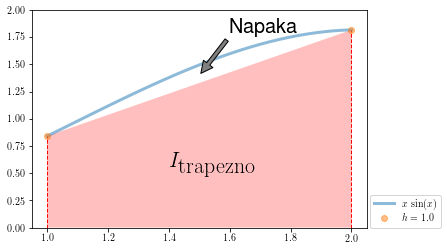

In [12]:
fig_trapezno()

### Napaka trapeznega pravila

Razlika med pravo vrednostjo integrala in numeričnim približkom $I$ je napaka metode:

$$E = \int_a^bf(x)\,d x-I,$$

Če je funkcija $f(x)$ vsaj dvakrat odvedljiva, se se lahko (glejte npr. vir: Burden, Faires, Burden: Numerical Analysis 10th Ed) izpelje ocena napake, ki velja samo za trapezni približek prek celega integracijskega intervala:
$$E_{\textrm{trapezno}}=-\frac{h^3}{12}f''(\xi),$$
kjer je $h=b-a$ in $\xi$ neznana vrednost na intervalu $[a,b]$.

## Sestavljeno trapezno pravilo

Če razdelimo interval $[a, b]$ na $n$ podintervalov in na vsakem uporabimo trapezno pravilo integriranja,  govorimo o *sestavljenem trapeznem pravilu* (angl. *composite trapezoidal rule*).

V tem primeru za vsak odsek $i$ uporabimo trapezno pravilo in torej za meje odseka $x_i$ in $x_{i+1}$ uporabimo uteži $A_i=A_{i+i}=h/2$. Ker so notranja vozlišča podvojena, sledi:
$$A_0=A_{n}=\frac{h}{2}\quad\textrm{in za ostala vozlišča:}\quad A_i=h.$$
Pri tem smo predpostavil podintervale enake širine:
$$h=\frac{x_{n}-x_0}{n}$$

Sledi torej:
$$I_{\textrm{trapezno sest}}=\sum_{i=0}^{n}A_i\,f(x_i)=\left(\frac{y_0}{2} + y_1+y_2+\cdots+y_{n-1}+\frac{y_{n}}{2}\right)\,h.$$

### Numerična implementacija

Numerična implementacija je trivialna:

In [13]:
def trapezno_sest(y, h):
    return (np.sum(y) - 0.5*y[0] - 0.5*y[-1])*h

### Numerični primer 

Zgoraj smo že pripravili podatke za dva odseka (tri vozlišča):

In [15]:
x3

array([ 1. ,  1.5,  2. ])

In [16]:
h3

Izračunajmo oceno integrala s sestavljenim trapeznim pravilom:

In [17]:
I_trapezno_sest = trapezno_sest(y3, h=h3)
I_trapezno_sest

Pripravimo sliko:

In [18]:
def fig_trapezno_sest():
    plt.fill_between(x3, y3, alpha=0.25, facecolor='r')
    plt.vlines(x3, 0, y3, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{trapezno sestavljeno}}$', (1.2, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.75, 1.68), xytext=(1.4, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\,\sin(x)$')
    plt.plot(x3, y3, 'o', alpha=0.5, label=f'$h={h3}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

In prikažemo:

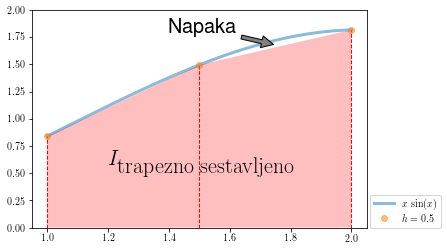

In [19]:
fig_trapezno_sest()

### Napaka sestavljenega trapeznega pravila

Napaka sestavljenega trapeznega pravila izhaja iz napake trapeznega pravila; pri tem tako napako naredimo $n$ krat.

Ker velja $h\cdot n=b-a$ izpeljemo napako sestavljenega trapeznega pravila kot:

$$E_{\textrm{trapezno sest}}=-\frac{h^2(b-a)}{12}f''(\xi),$$

$\xi$ je neznana vrednost na intervalu $[a,b]$.

### Izboljšana ocena integrala

V kolikor integral $I$ ocenjujemo pri dveh različnih korakih $h$ in $2\,h$, velja natančno:
$$\int_a^b f(x)\,\textrm{d}x = I_h + E_h = I_{2h} + E_{2h},$$
kjer je $I_h$ približek integrala s korakom $h$ in $E_h$ ocena napake pri koraku $h$; analogno velja za $I_{2h}$ in $E_{2h}$.

Če predpostavimo, da je $f''\left (\xi \right )$ v obeh primerih enak, lahko določimo razliko $I_{2h}-I_{h} = E_{h}-E_{2h}$. 

Naprej zapišemo:

$$E_h=-\frac{h^2(b-a)}{12}f''(\xi)=h^2\,K.$$

Ob predpostavki, da je $f''\left (\xi \right )$ pri koraku $h$ in $2h$ enak ($\xi$ je pri koraku $h$ in $2h$ dejansko različen), zapišemo:
$$E_{2h}=-\frac{(2h)^2(b-a)}{12}f''(\xi)=4\,h^2\,K$$

Sledi:

$$I_{2h}-I_h=-3K\,h^2.$$

Sedaj lahko ocenimo napako pri koraku $h$:

$$\overline{E}_h=h^2\,K=\frac{I_h-I_{2h}}{3}.$$

Na podlagi ocene napake, lahko izračunamo boljši približek  $I_{h}^*$:
$$I_h^* = I_h - \frac{1}{3}\,(I_{2h}-I_h)$$
ali
$$I_h^* = \frac{4}{3}\,I_h - \frac{1}{3}\,I_{2h}$$

### Numerični primer

Predhodno smo s trapeznim pravilom že izračunali integral pri koraku $h=1$ in pri koraku $h=0.5$, rezultata sta bila:

In [20]:
[I_trapezno, I_trapezno_sest]

S pomočjo zgornje formule izračunamo boljši približek:

In [23]:
I_trapezno_boljši = 4/3*I_trapezno_sest - 1/3*I_trapezno
print(f'Točen rezultat:   {I_točno}\nBoljši približek: {I_trapezno_boljši}')

Točen rezultat:   1.4404224209802097
Boljši približek: 1.4408392930139313


### ``numpy`` implementacija sestavljenega trapeznega pravila

Sestavljeno trapezno pravilo je implementirano tudi v paket ``numpy.trapz``:

``trapz(y, x=None, dx=1.0, axis=-1)``.

* `y` predstavlja tabelo funkcijskih vrednost, 
* `x` je opcijski parameter in definira vozlišča, če parameter ni definiran se privzame ekvidistančna vozlišča na razdalji `dx`. 
* `dx` definira (konstanten) korak integracije ima privzeto vrednost 1. 
* `axis` definira *os* op kateri se integrira (v primeru, da je `y` večdimenzijsko numerično polje).

Funkcija vrne izračunani integral po sestavljenem trapezne pravilu. Več informacij lahko najdete v [dokumentaciji](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html)

Poglejmo si primer:

In [25]:
#%%timeit
I_trapezno_np = np.trapz(y3, dx=h3)
I_trapezno_np

## Simpsonova in druge metode

Zgoraj smo si pogledali trapezno pravilo, ki temelji na linearni integracijski funkciji na posameznem podintervalu. Z interpolacijo višjega reda lahko izpeljemo še druge integracijske metode.

Izračunati moramo:
$$\int_{a}^b f(x)\,dx.$$

Sedaj $f(x)$ interpoliramo z Lagrangevim interpolacijskim polinomom $P_n(x)$ stopnje $n$:
$$P_n(x)=\sum_{i=0}^{n}\,f(x_i)\,l_i(x),$$
kjer so $y_i=f(x_i)$ funkcijske vrednosti v vozliščih $x_i$ in je Lagrangevega polinoma $l_i$ definiran kot:
$$l_i(x)=\prod_{j=0, j\ne i}^n \frac{x-x_j}{x_i-x_j}.$$

Za numerični izračun integrala namesto funkcije $f(x)$ vstavimo v integral interpolacijski polinom $P_n(x)$:
$$I=\int_{x_0}^{x_{n-1}} P_n(x)\,dx=\int_{x_0}^{x_{n-1}} \sum_{i=0}^{n}\,f(x_i)\,l_i(x)\,dx.$$

Ker je integriranje linearna operacija, lahko zamenjamo integriranje in vsoto:
$$I=\sum_{i=0}^{n}\,f(x_i)\,\underbrace{\int_{x_0}^{x_{n-1}} l_i(x)\,dx}_{A_i}.$$
Opazimo, da lahko Lagrangev polinom integriramo in da predstavlja uteži $A_i$.

### Izpeljava trapeznega pravila z uporabo Lagrangevih polinomov

Poglejmo si kako z Lagrangevim interpolacijskim polinomom prve stopnje, strojno izpeljemo uteži $A_i$ v primeru trapeznega pravila.

Najprej v simbolni obliki definirajmo spremenljivko `x`, vozlišči `x0` in `x1` ter korak `h`:

In [26]:
x, x0, x1, h = sym.symbols('x x0, x1, h')

Pripravimo pripravimo Python funkcijo, ki v simbolni obliki vrne koeficiente seznam $n$ Lagrangevih polinomov $[l_0(x), l_1(x),\dots, l_{n-1}(x)]$ stopnje $n-1$:

In [27]:
def lagrange(n, x, vozlišča_predpona='x'):
    if isinstance(vozlišča_predpona, str):
        vozlišča = sym.symbols('{0:s}:{1:g}'.format(vozlišča_predpona, n)) 
    coeffs = []
    for i in range(0, n):
        numer = []
        denom = []

        for j in range(0, n):
            if i == j:
                continue

            numer.append(x    - vozlišča[j])
            denom.append(vozlišča[i] - vozlišča[j])
        
        numer = sym.Mul(*numer)
        denom = sym.Mul(*denom)

        coeffs.append(numer/denom)
    return coeffs    

Najprej poglejmo Lagrangeva polinoma za linearno interpolacijo ($n=2$):

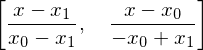

In [28]:
lag = lagrange(2, x)
lag

Sedaj Lagrangev $l_0(x)$ integriramo čez celotni interval:

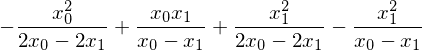

In [29]:
int0 = sym.integrate(lag[0], (x, x0, x1))
int0

Izvedemo sedaj razcep polinoma:

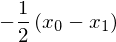

In [32]:
int1 = int0.factor()
int1

Ker je širina odseka konstantna $h$, izvedemo zamenjavo:

In [33]:
zamenjave = {x1: x0+h}
int1.subs(zamenjave)

Zgornje korake za Lagrangev polinom  $l_0(x)$ lahko posplošimo za seznam Lagrangevih polinomov:

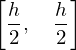

In [34]:
x, x0, x1, h = sym.symbols('x, x0, x1, h')
zamenjave = {x1: x0+h}
A_trapez = [sym.integrate(li, (x, x0, x1)).factor().subs(zamenjave) 
            for li in lagrange(2, x)]  # za vsak lagrangev polimom `li` v seznamu lagrange(2,x)
A_trapez

Opazimo, da smo izpeljali uteži, ki smo jih uporabili pri trapezni metodi:
$$A_0=h/2\qquad A_1=h/2.$$

Trapezno pravilo je:

$$\int_{x_0}^{x_1}f(x)\,\textrm{d}x=
\underbrace{\frac{h}{2}\cdot\left(f(x_0)+f(x_1)\right)}_{I_{\textrm{trapezno}}}{~}
\underbrace{-\frac{h^3}{12}f''(\xi)}_{E_{\textrm{trapezno}}},$$
kjer je $\xi$ na intervalu $[x_0, x_1]$.

### Izračun uteži za Simpsonovo 1/3 pravilo

Potem ko smo zgoraj pokazali strnjen izračun za trapezno pravilo, lahko podobno izvedemo za kvadratno interpolacijo čez tri točke ($n=3$).

Izračun uteži je analogen zgornjemu in skoraj trivialen:

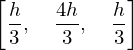

In [35]:
x, x0, x1, x2, h = sym.symbols('x, x0, x1, x2, h')
zamenjave = {x1: x0+h, x2: x0+2*h}
A_Simpson1_3 = [sym.integrate(li, (x, x0, x2)).factor().subs(zamenjave).factor() 
             for li in lagrange(3, x)]
A_Simpson1_3

Simpsonovo 1/3 pravilo (ime izhaja iz uteži prvega člena) je:

$$\int_{x_0}^{x_2}f(x)\,\textrm{d}x=
\underbrace{\frac{h}{3}\cdot\left(f(x_0)+4\,f(x_1)+f(x_2)\right)}_{I_{\textrm{Simpsonovo 1/3}}}{~}
\underbrace{-\frac{h^5}{90}f^{(4)}(\xi)}_{E_{\textrm{Simpsonovo 1/3}}},$$
kjer je $\xi$ na intervalu $[x_0, x_2]$.

Primer uporabe:

In [37]:
I_Simps13 = h3/3 * np.sum(y3 * [1, 4, 1])
I_Simps13

Pripravimo sliko:

In [47]:
from scipy import interpolate

In [ ]:
x_int = np.linspace(xg[0], xg[-1], n.subs(podatki)+1) # več intervalov
y_d_Simpson1_3 = fun_d(x_d_Simpson1_3)
y_interpolate = interpolate.lagrange(x_d_Simpson1_3, y_d_Simpson1_3)

In [18]:
def fig_Simpsonova13():
    plt.fill_between(x3, y3, alpha=0.25, facecolor='r')
    plt.vlines(x3, 0, y3, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{trapezno sestavljeno}}$', (1.2, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.75, 1.68), xytext=(1.4, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\,\sin(x)$')
    plt.plot(x3, y3, 'o', alpha=0.5, label=f'$h={h3}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

In prikažemo:

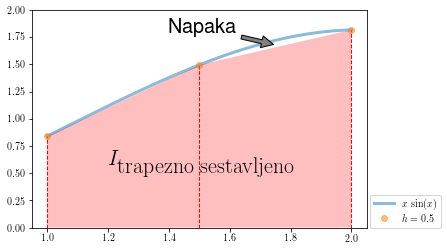

In [19]:
fig_trapezno_sest()

### Izračun uteži za Simpsonovo 3/8 pravilo

Nadaljujemo lahko s kubično interpolacijo čez štiri točke ($n=4$):

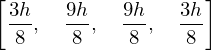

In [38]:
x, x0, x1, x2, x3, h = sym.symbols('x, x0, x1, x2, x3, h')
zamenjave = {x1: x0+h, x2: x0+2*h, x3: x0+3*h}
A_Simpson3_8 = [sym.integrate(li, (x, x0, x3)).factor().subs(zamenjave).factor() 
                for li in lagrange(4, x)]
A_Simpson3_8

Simpsonovo 3/8 pravilo je:

$$\int_{x_0}^{x_3}f(x)\,\textrm{d}x=
\underbrace{\frac{3h}{8}\cdot\left(f(x_0)+3\,f(x_1)+3f(x_2)+f(x_3)\right)}_{I_{\textrm{Simpsonovo 3/8}}}{~}
\underbrace{-\frac{3h^5}{80}f^{(4)}(\xi)}_{E_{\textrm{Simpsonovo 3/8}}},$$
kjer je $\xi$ na intervalu $[x_0, x_3]$.

Poglejmo si primer uporabe. Uporabimo pripravjeno tabelo vrednosti funkcije v štirih točkah:

In [42]:
y4

array([ 0.84147098,  1.2959172 ,  1.65901326,  1.81859485])

In [43]:
I_Simps38 = 3*h4/8 * np.sum(y4 * [1, 3, 3, 1])
I_Simps38

### Izračun za uteži na podlagi interpolacijskega polinoma 4. stopnje

Nadaljujemo lahko z interpolacijskim polinomom 4. stopnje (čez pet točk, $n=5$):

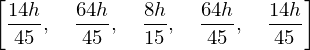

In [44]:
x, x0, x1, x2, x3, x4, h = sym.symbols('x, x0, x1, x2, x3, x4, h')
zamenjave = {x1: x0+h, x2: x0+2*h, x3: x0+3*h, x4: x0+4*h}
A_Pretiravanje = [sym.integrate(li, (x, x0, x4)).factor().subs(zamenjave).factor() 
                for li in lagrange(5, x)]
A_Pretiravanje

Interpolacijski polinom 4 stopnje rezultira v numerično integracijo:

$$\int_{x_0}^{x_4}f(x)\,\textrm{d}x=
\underbrace{\frac{2h}{45}\cdot\left(7f(x_0)+32\,f(x_1)+12f(x_2)+32f(x_3)+7f(x_4)\right)}_{I_{\textrm{4. stopnje}}}{~}
\underbrace{-\frac{8h^7}{945}f^{(7)}(\xi)}_{E_{\textrm{4. stopnje}}},$$
kjer je $\xi$ na intervalu $[x_0, x_4]$.

Poglejmo si primer uporabe. Uporabimo pripravjeno tabelo vrednosti funkcije v petih točkah:

In [45]:
y5

array([ 0.84147098,  1.18623077,  1.49624248,  1.72197541,  1.81859485])

In [46]:
I_4stopnje = 2*h5/45 * np.sum(y5 * [7, 32, 12, 32, 7])
I_4stopnje

## Prikaz uporabe Simpsonove 1/3 metode

In [45]:
from scipy import interpolate

In [46]:
x_d_Simpson1_3 = np.linspace(x_d[0], x_d[1], n.subs(podatki)+1) # več intervalov
y_d_Simpson1_3 = fun_d(x_d_Simpson1_3)
y_interpolate = interpolate.lagrange(x_d_Simpson1_3, y_d_Simpson1_3)

izberi = (x_d[0] <= x_d_polno) & (x_d_polno <= x_d[1])
# prikaz
def slika():
    plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
    plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
    plt.plot(x_d_Simpson1_3, y_d_Simpson1_3, 'ro', label='Meje odseka')
    plt.plot(x_d_polno, y_interpolate(x_d_polno), 'b', label='Interpolacija')
    plt.fill_between(x_d_polno[izberi], y_interpolate(x_d_polno[izberi]), 
                     alpha=0.25, facecolor='b')
    plt.annotate('Simpsonovo 1/3 pravilo: $n$={}'.format(n.subs(podatki)), (.4, 0.2))
    plt.ylim(-0.3, 1.1)
    plt.legend(loc=(1.01, 0));
    plt.show()

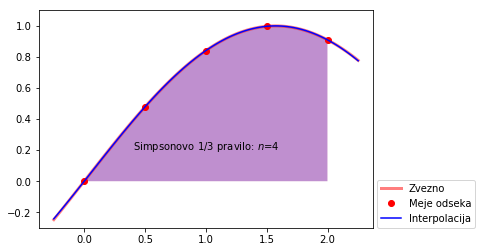

In [47]:
slika()

### Numerična implementacija sestavljenega Simpsonovega 1/3 pravila

Spomnimo se uteži za Simpsonovo 1/3 pravilo:

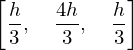

In [48]:
A_Simpson1_3

V kolikor želimo to uporabiti na ne več kot treh točkah, lahko to naredimo na podoben način kot pri trapeznem pravilu, vendar moramo tukaj malenkost bolj paziti. Potrebujemo najmanj tri točke, število točk pa mora biti liho, saj interpoliramo čez tri točke. Ker je med odseki ena točka skupna, imajo te točke v bistvu dvojno utež. Numerična implementacija je tukaj:

In [49]:
def simpson1_3(y, h=1., izpis=True):
    utezi = np.array([1., 4., 1.])/3*h
    if len(y)%2 == 0:
        raise Exception('Ne morem uporabiti Simpsonovega 1/3 pravila.\
        Pričakovano liho število vrednosti.')
    utezi_arr = np.zeros_like(y)
    for i in range(len(y)//2):
        utezi_arr[2*i:2*i+3] = utezi_arr[2*i:2*i+3] + utezi
    if izpis:
        print(utezi_arr)
    return utezi_arr.dot(y)

Primer uporabe:

In [50]:
#%%timeit
h_d = x_d_Simpson1_3[1]-x_d_Simpson1_3[0]
I_Simpson1_3 = simpson1_3(y_d_Simpson1_3, h_d, izpis=False)
I_Simpson1_3

In [51]:
I_Simpson1_3_2h = simpson1_3(y_d_Simpson1_3[::2], 2*h_d, izpis=False)
I_Simpson1_3_2h

In [52]:
I_analiticno

In [53]:
I_trapezno_sestav

### ``scipy`` implementacija

In [54]:
from scipy import integrate

In [55]:
#%%timeit
integrate.simps(y_d_sestav, dx=h_d)

Sicer lahko uteži različnih *Newton-Cotesovih* pristopov pridobimo takole:

In [56]:
integrate.newton_cotes(3)

(array([ 0.375,  1.125,  1.125,  0.375]), -0.0375)

Če nas na vsakem odseku zanima rezultat, pa lahko uporabimo funkcijo ``integrate.cumtrapz``:

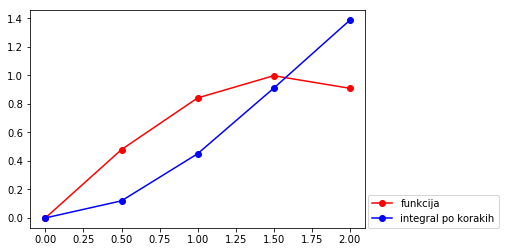

In [57]:
I_po_korakih = integrate.cumtrapz(y_d_sestav, dx=h_d, initial=0)
plt.plot(x_d_sestav, y_d_sestav, 'ro-', label='funkcija')
plt.plot(x_d_sestav, I_po_korakih, 'bo-', label='integral po korakih');
plt.legend(loc=(1.01, 0));

### Napaka sestavljene Simpsonove 1/3 metode

Ocena napake (vir: Jaan Kiusalaas: Numerical Methods in Engineering With Python 3, 3rd Ed) za sestavljeno Simpsonov 1/3 pravilo je:

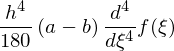

In [58]:
E_simpsonovo_sestav = - (b - a) * h**4 / 180 * f(xi).diff(xi, 4)
E_simpsonovo_sestav

kjer je $\xi$ neznana vrednost na intervalu $[a, b]$.

Podobno kot pri trapeznem pravilu, lahko pri dveh različnih korakih ($h$ in $2h$) ocenimo $\frac{d^4}{d \xi^4}  f\left (\xi \right )$:

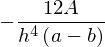

In [59]:
f4 = sym.solve(
    sym.Eq(A, E_simpsonovo_sestav - E_simpsonovo_sestav.subs(h, 2*h))
    , f(xi).diff(xi, 4)
)[0]
f4

Kjer je $A = I_{2h}-I_h$. Izpeljani izraz vstavimo v izraz za oceno napake in izpeljemo:

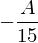

In [60]:
E_simpsonovo_sestav.subs(f(xi).diff(xi, 4), f4).simplify()

Končno lahko torej določimo ob pomoči približka s korakom $h$ in $2\;h$ boljši približek:
$$I_h^* = \frac{16}{15}\,I_h - \frac{1}{15}\,I_{2h}.$$

In [61]:
16/15*I_Simpson1_3-1/15*I_Simpson1_3_2h

In [62]:
I_analiticno

In [63]:
I_Simpson1_3

# Gaussov integracijski pristop - Gaussova kvadratura

Pristop k integriranju zgoraj je temeljil na konstantnem koraku in izbrano pravilo (pravokotno, trapezno, Simpsonovo,...) rezultira v točen rezultat, v kolikor je integrirana funkcija $f(x)$ polinom enake ali nižje stopnje, kot je uporabljena interpolacija posameznega Newton-Cotesovega pristopa (npr. trapezno pravilo izračuna točno linearne funkcije).

Ideja *Gaussove integracije/kvadrature* je v principu drugačna. Da jo spoznamo, si poglejmo spodnjo sliko:

In [64]:
#poljubno izbrane točke na intervalu [a, b]
x_izbrane = np.asarray([0.4, 1.5])
y_izbrane = fun_d(x_izbrane)
lin_inter = interpolate.lagrange(x_izbrane, y_izbrane)
#
def slika():
    plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
    plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
    plt.plot(x_d, y_d, 'ro', label='Diskretno')
    plt.fill_between(x_d, y_d, alpha=0.25, facecolor='b')
    plt.plot(x_izbrane, y_izbrane, 'go', label='Poljubno izbrane')
    plt.fill_between(x_d, lin_inter(x_d), alpha=0.25, facecolor='g')
    plt.annotate('Trapezno pravilo', (.8, 0.2))
    plt.annotate('Poljubno izbrana vozlišča', (.8, 0.90), rotation=30)
    plt.ylim(-0.3, 1.3)
    plt.legend(loc=(1.01, 0));
    plt.show()

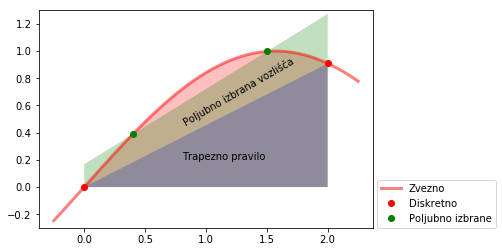

In [65]:
slika()

S slike opazimo, da bi lahko z drugačno izbiro vozlišč tudi s trapeznim pravilom bolje aproksimirali integral. In ravno v tem je ideja Gaussovega pristopa k aproksimaciji integrala; cilj je integral funkcije $f(x)$ nadomestiti z uteženo vsoto vrednosti funkcije pri diskretnih vrednostih $f(x_i)$:
$$\int_a^bf(x)\,dx\approx \sum_i^{n-1} w_i\, f(x_i).$$
Pri tem je neznana utež $w_i$ in tudi lega vozlišča $x_i$. Z večanjem števila uteži $n$ bomo lahko povečali tudi stopnjo interpolacijskega polinoma.

V nadaljevanju si bomo torej pogledali Gaussovo kvadraturo in spoznali, da lahko zelo učinkovito izračunamo točen integral. Prednost Gaussove kvadrature je tudi, da lahko izračuna integral funkcij s singularnostmi (npr: $\int_0^1\sin(x)/\sqrt{(x)}\,dx$).

## Gaussova kvadratura z enim vozliščem

Predpostavimo, da želimo integrirati polinom stopnje $n=1$ (linearna funkcija):
$$f(x)=P_1(x)=A_0+A_1\,x.$$
Točen rezultat integrala $\int_a^bP_1(x)\,\textrm{d}x$ je:

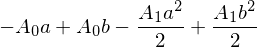

In [66]:
A0, A1, x, a, b, w0, x0 = sym.symbols('A0, A1, x, a, b, w0, x0')
P1 = A0 + A1*x
P1.integrate((x, a, b))

Če bi želeli integral izračunati glede na vrednosto funkcije $f$ v neznanem vozlišču $x_0$:
$$\int_a^bP_1(x)dx = w_0\,P_1(x_0),$$
potem moramo najti tudi ustrezno utež $w_0$. 
Zapišimo enačbo simbolno:

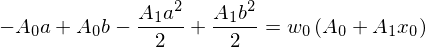

In [67]:
sym.Eq(P1.integrate((x, a, b)).expand(), w0*P1.subs(x, x0))

Spomnimo, da sta $a$ in $b$ znani meji, $A_i$ konstante poljubne linearne funkcije, $w_0$ in $x_0$ pa neznani vrednosti. Ker sta $A_i$ poljubni, lahko iz zgornjega izraza izpeljemo dve enačbi (najprej je samo $A_0\neq0$, potem pa samo $A_1\neq0$):

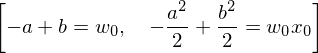

In [68]:
eqs = [sym.Eq(P1.integrate((x, a, b)).expand().coeff(A_),\
              w0*P1.subs(x, x0).coeff(A_))\
       for A_ in [A0, A1]]
eqs

Izpeljali smo dve enačbi in dve neznanki, sistem lahko rešimo:

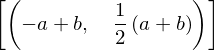

In [69]:
sym.solve(eqs, [w0, x0])

Zaradi lažje splošne uporabe pri Gaussovi kvadraturi tipično uporabljamo meji $a=-1$ in $b=1$.

Poljubne meje $x\in[a,b]$ lahko vedno transformiramo v meje $\xi\in[-1, +1]$ s pomočjo:
$$x=\frac{b+a}{2}+\frac{b-a}{2}\xi$$
posledično je Gaussova kvadratura potem:
$$\int_a^bf(x)\,dx\approx\frac{b-a}{2}\sum_i A_i\,f(x_i).$$

V primeru standardiziranih mej, je utež $w_0=2$ in $x_0=0$ vrednost, pri kateri moramo izračunati funkcijo $f$. Če je integrirana funkcija linearna, bomo torej samo na podlagi vrednosti v eni točki izračunali pravo vrednost!

Če je bila razlaga prehitra ali premalo jasna, vam priporočam ogled tega video posnetka:
https://www.youtube.com/watch?v=iQ5-4hx25Rw

## Gaussova kvadratura z več vozlišči

Tukaj želimo zgornji pristop posplošiti na $n$ vozlišč:
$$\int_a^bP_{2n-1}(x)dx = \sum_i^n w_i\,P_{2n-1}(x_i),$$
kot zgornja enačba nakazuje, je treba za Gaussovo kvadraturo z $n$ vozlišči uporabiti polinom stopnje $2n-1$:
$$f(x)=P_{2n-1}(x)=\sum_{i=0}^{2n-1} A_i\,x^i.$$
To je v bistvu zelo dobro, saj z dvema Gaussovima vozliščema točno izračunamo integral polinoma do 3. reda, s tremi Gausovimi vozlišči pa točno izračunamo integral polinoma do 5. reda!

Pripravimo si najprej simbolni zapis polinoma in ustreznih spremenljivk:

In [70]:
def P_etc(n=1, A='A', X='X'):
    A = sym.symbols('{0:s}:{1:g}'.format(A, n))
    X = sym.symbols(X)
    return A, X, sum([A[i]*X**i for i in range(n)])

In [71]:
stevilo_tock = 2
A, X, P = P_etc(n=2*stevilo_tock)
x = sym.symbols('x:{0:g}'.format(stevilo_tock))
w = sym.symbols('w:{0:g}'.format(stevilo_tock))

In [72]:
P

Definirajmo enačbe:

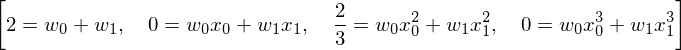

In [73]:
eqs = [sym.Eq(P.integrate((X, -1, 1)).coeff(A_),\
              sum([w[i]*P.subs(X, x[i]) \
                   for i in range(stevilo_tock)]).expand().coeff(A_)) \
       for A_ in A]
eqs

In jih rešimo

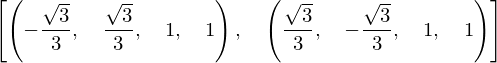

In [74]:
sol = sym.solve(eqs, sym.flatten((x, w)))
sol

Reševanje zgornjega problema je nelinearno, zato dobimo več rešitev in simbolno je smiselno reševati do treh vozlišč.

| Število točk | Vozlišče  $x_i$ | Utež $w_i$ |
|:------------:|:------------:|:------------:|
||||
|1 | 0 | 2 |
||||
|2 | $-\frac{\sqrt{3}}{3}$ | 1 |
| | $+\frac{\sqrt{3}}{3}$ | 1 |
||||
| | $-\frac{\sqrt{15}}{5}$ | $\frac{5}{9}$ |
|3 | $0$ | $\frac{8}{9}$ |
| | $\frac{\sqrt{15}}{5}$ | $\frac{5}{9}$ |


Vsebino bi tukaj lahko nadaljevali s pregledom različnih pravokotnih (ne bomo se spustili podrobneje v pomen termina *pravokotnih polinomov*) polinomov (npr. *Legendre*, *Chebyshev*, *Leguerre*, *Hermite*). 

Naprej bi lahko nadaljevali v smeri Gaussove integracije v več dimenzijah, ki se pogosto uporablja npr. pri končnih elementih.

Ker pa bi s tem bistveno presegli namen tega predmeta in ker je za osnovno uporabo v praksi zavedanje predhodno navedene teorije dovolj, se bomo s teorijo numeričnega integriranja tukaj ustavili.

## Uporaba ``scipy.integrate`` modula

Uporaba vgrajenih funkcij je zelo enostavna; tudi meje so samodejno transformirane.

In [75]:
I_analiticno

In [76]:
integrate.quadrature(fun_d, 0, 2, maxiter=2)

C:\Users\Janko\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (2) exceeded. Latest difference = 2.727850e-01
  AccuracyWarning)


In [77]:
#%%timeit
integrate.quadrature(fun_d, 0, 2)

In [78]:
#%%timeit
integrate.quad(fun_d, 0, 2)

# Nekaj vprašanj za razmislek!

1. Na sliki (vir: J. Slavič: Dinamika, meh. nihanja..., 2014) je prikazan trikotnik s stranicami dolžine $a$, $b$, debelino $h$ in gostoto $\rho$.
<img src="./fig/Slavic_2014_str_242_slika_5.4.png" width=200>
V simbolni obliki določite masni vztrajnostni moment glede na prikazano os $y$:
$$J_{yy}=\int_0^b y^2\,\rho\,h\,(a-a/b\,y)\,dy.$$
Upoštevajte tudi: $m=a\,b\,h\,\rho/2$. Za izmišljene vrednosti izračunajte numerični rezultat.
* Izračunajte integral tudi numerično. Uporabite ``scipy.integrate`` in integrirajte glede na pravila: trapezno, Simpsonovo 1/3. Rezultat primerjajte tudi z Gaussovo kvadraturo.
Raziščite natančnost in hitrost metod.
* Preštudirajte ``scipy.special.legendre``, ki vam vrne objekt ``orthopoly1d``. Ta objekt ima metodo ``weights``, ki vrne seznam ``[x, w, mu0]`` vrednosti, ki jih uporabimo pri Gaussovi kvadraturi. (Če vsega ne razumete, ne skrbite preveč, bo asistent pokazal/komentiral). Opazite lahko, da smo vrednosti izpeljali na predavanjih!
* S pomočjo zgoraj pridobljenih uteži in vozlišč izračunajte integral s pomočjo Gaussove kvadrature: $\sum_iw_i\,f(x_i)$. Pazite na transformacijo mej:
$$x=\frac{b+a}{2}+\frac{b-a}{2}\xi$$
$$\int_a^bf(x)\,dx\approx\frac{b-a}{2}\sum_i A_i\,f(x_i).$$
* Preprost integral $\int_0^2x^2\,dx$ izrabite za prikaz trapeznega in Simpsonovega 1/3 pravila (osnovno pravilo, ne sestavljeno). Uteži izračunajte z uporabo ``scipy``.
* Integral predhodne točke razširite za sestavljeno trapezno pravilo (lastna koda). Prikažite vpliv števila odsekov, primerjte napako izračuna s predhodnim številom odsekov in prikažite konvergenco.
* Integral predhodne točke razširite za sestavljeno Simpsonovo 1/3 pravilo (lastna koda). Prikažite vpliv števila odsekov, primerjte napako izračuna s predhodnim številom odsekov in prikažite konvergenco.
* Z različnimi metodami izračunajte integrala:
$$\int_1^2\frac{\sin(x)}{\sqrt{x}}$$
in
$$\int_0^1\frac{\sin(x)}{\sqrt{x}}.$$
* S pomočjo numeričnega integriranja določite ekvivalentno silo porazdeljene obremenitve ($Q$) ter njeno prijemališče vzdolž nosilca ($x_Q$) dolžine $L = 2\,$m. Konstanta obremenitve: $q_0 = 5\,$kN/m.
<img src="./fig/nal-num_integriranje_1-1.jpg" width=350>
Rešitev: 
ekvivalentna obremenitev $Q = \int_0^L{q(x) \mathrm{d}x}$, pozicija (težišče) $x_Q = \frac{ \int_0^L{x\,q(x) \mathrm{d}x} }{ \int_0^L{q(x) \mathrm{d}x} }$

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 11 - polovica.ipynb).

# Dodatno

1. Obravnavajte prikazan enoosni primer, obremenjen s porazdeljeno obremenitvijo $n(x)$ ter točkovno silo $F=10\,$kN. Dolžina palice je $L = 2\,$m, konstanta $n_0 = 15\,$kN/m in $EA = 200000\,\mathrm{MPa} \times 50×50\, \mathrm{mm^2}$.
<img src="./fig/nal-num_integriranje_2-2.jpg" width=350>
Naloga: 
    1. S pomočjo simbolnega integriranja določite funkcijo notranje osne sile $N(x)$.
    * S pomočjo numeričnega integriranja izračunajte pomik prostega konca palice $u_0$.